# Ramsey King
# DSC 550 - Data Mining
# October 10, 2021
# Term Project Milestone 1

In [4]:
# Retreive talks from topics page using beautifulsoup

from bs4 import BeautifulSoup as bs
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [25]:
# Get list of urls for each of the topics

url = "https://speeches.byu.edu/topics/"

url_list = ['life/', 'jesus-christ/', 'faith/', 'learning/', 'service/']

links = []
new_links = []
for u in url_list:

    response = requests.get(url+u)
    html = response.content
    video = '?M=V'
    soup = bs(html, "lxml")
    for link in soup.findAll("a", attrs={'href': re.compile("^https://speeches.byu.edu/talks/[\D+]")}):
        links.append(link.get('href').replace(video, ''))

    audio = '?M=A'
    for link in links:
        new_link = link.replace(audio, '')
        new_links.append(new_link)
    new_links = list(set(new_links))



In [108]:
# Retrieves talk text from each of the urls using beautiful soup.
talk_text = []
title_text = []
topics = []
dates = []
speakers = []

for link in new_links:
    url = link
    response = requests.get(url)
    html = response.content
    soup = bs(html, 'lxml')
    temp_list = []

    link_splitter = link.split('/')
    speakers.append(link_splitter[4].replace('-', ' '))

    for div in soup.find_all('div', class_='single-speech__content'):
        talk_text.append(div.get_text(strip=True))
    for h1 in soup.find_all('h1', class_='single-speech__title'):
        title_text.append(h1.get_text(strip=True))        
    for p in soup.find_all('p', class_='single-speech__speaker-subtext single-speech__date'):
        dates.append(p.get_text(strip=True))
    for p in soup.find_all('p', class_='single-speech__related-tag'):
        temp_list.append(p.get_text(strip=True))
        temp_str = ','.join(temp_list)
    topics.append(temp_str)


dict = {'titles': title_text , 'speaker': speakers, 'date': dates, 'talks': talk_text, 'topics': topics, }
df = pd.DataFrame(dict)
df.to_csv('talks.csv')

In [152]:
# get character lengths of each talk (may need to eliminate those less than 250 chars)
df['char_lengths'] = pd.Series([len(x) for x in df.talks])
# df.head(10)

In [153]:
# get word count of each talk
df['word_count'] = df['talks'].apply(lambda x: len(re.findall(r'\w+', x)))

In [177]:
# reduce the topic to the ones selected from our original selection ('life', 'jesus-christ', 'faith', 'learning', 'service')

# the single_topic function takes the list of topics in the 'topics' column and will return the first topic it finds in the 'topic_selection_list'
def single_topic(dataframe_topics):
    column = [word for word in dataframe_topics.split(',')]
    the_string =  ', '.join([val for ind, val in enumerate(topic_selection_list) if val in column])
    return the_string.split(',')[0]

topic_selection_list = [x[:-1].replace('-', ' ') for x in url_list]
df['topics'] = df['topics'].apply(lambda x: x.lower())
df['topic_singular'] = df['topics'].apply(single_topic)
# remove quotations ("") from titles
df['titles'] = df['titles'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# convert date from object type to datetime type so a separate month and year column can be created
# df['date'] = pd.to_datetime(df['date'], format="%B %#d, %Y")
df['month'] = df['date'].apply(lambda x: x.split(' ')[0])
df['year'] = df['date'].apply(lambda x: x.split(' ')[2]).astype(int)
df.shape


(456, 10)

In [178]:
# Take a peek at the data
df.head(7)

,titles,speaker,date,talks,topics,char_lengths,word_count,topic_singular,month,year
0,A Proper Orientation on the Threshold of Life,mark e petersen,"January 1, 1962","The things of the world, or of the flesh, must...","life,revelation",236,43,life,January,1962
1,Building Your Future,earl m woolley,"October 3, 2000",It is frightening to be asked to speak to you ...,"learning,life",23750,4084,life,October,2000
2,Would You Sell,carlos e asay,"March 13, 1984",It is reported that the Prophet Joseph Smith s...,"life,opportunity",25098,4579,life,March,1984
3,One Step Enough,john s tanner,"June 30, 1992",In a Facetious Little Essay entitled “On Trans...,faith,26039,4710,faith,June,1992
4,The Story of My Life,thomas l martin,"October 30, 1951",Thomas L. Martin humorously describes the main...,"adversity,attitude,blessings,commitment,decisi...",239,41,faith,October,1951
5,The Power of Your Words,craig manning,"January 31, 2017",I would like to explain the sequence of how I ...,"faith,fear,podcast: recent speeches",17937,3326,faith,January,2017
6,Prepare for Useful Service,antoine r ivins,"December 3, 1963",Antoine R. Ivins gives students spiritual and ...,"preparation,service",216,34,service,December,1963


In [179]:
print("Describe Data")
print(df.describe())
print("Summarized Data")
print(df.describe(include=['O']))

Describe Data
       char_lengths   word_count         year
count    456.000000   456.000000   456.000000
mean   17916.844298  3259.418860  1997.914474
std    11164.464968  2038.400655    18.178702
min       84.000000    13.000000  1949.000000
25%     8087.500000  1446.250000  1987.000000
50%    20933.500000  3809.000000  2003.000000
75%    25403.250000  4675.250000  2012.000000
max    44865.000000  8284.000000  2021.000000
Summarized Data
                   titles            speaker            date  \
count                 456                456             456   
unique                453                304             424   
top     Go Forth to Serve  cecil o samuelson  April 30, 2004   
freq                    3                 13               6   

                                                    talks topics  \
count                                                 456    456   
unique                                                415    334   
top     The text for this speec

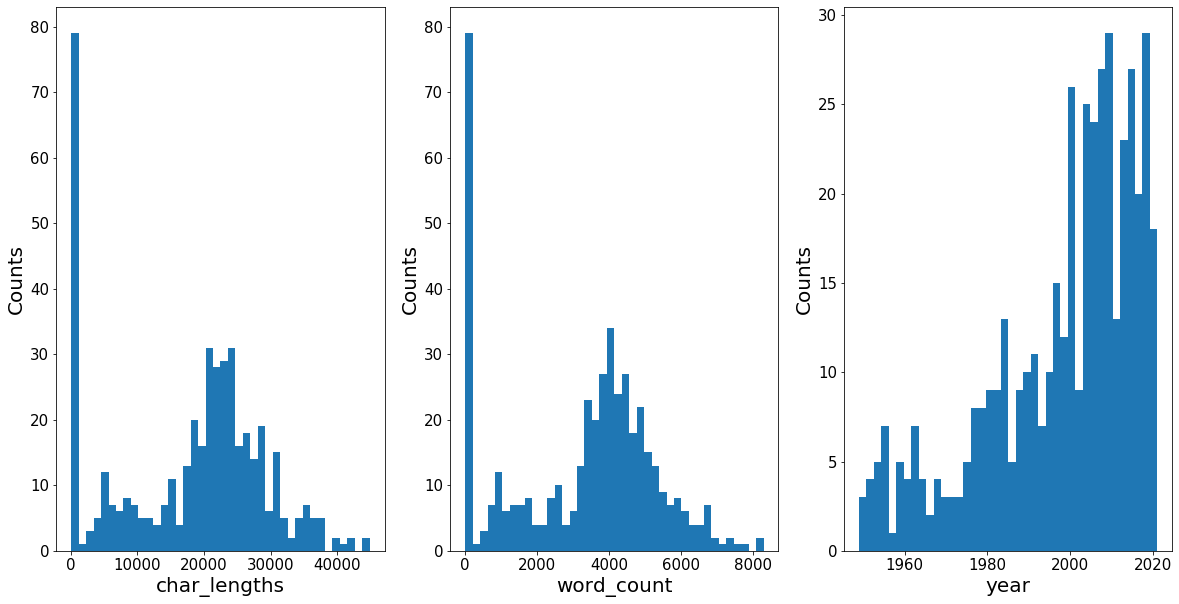

In [182]:
import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)

# Specify the features of interest
num_features = ['char_lengths', 'word_count', 'year']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

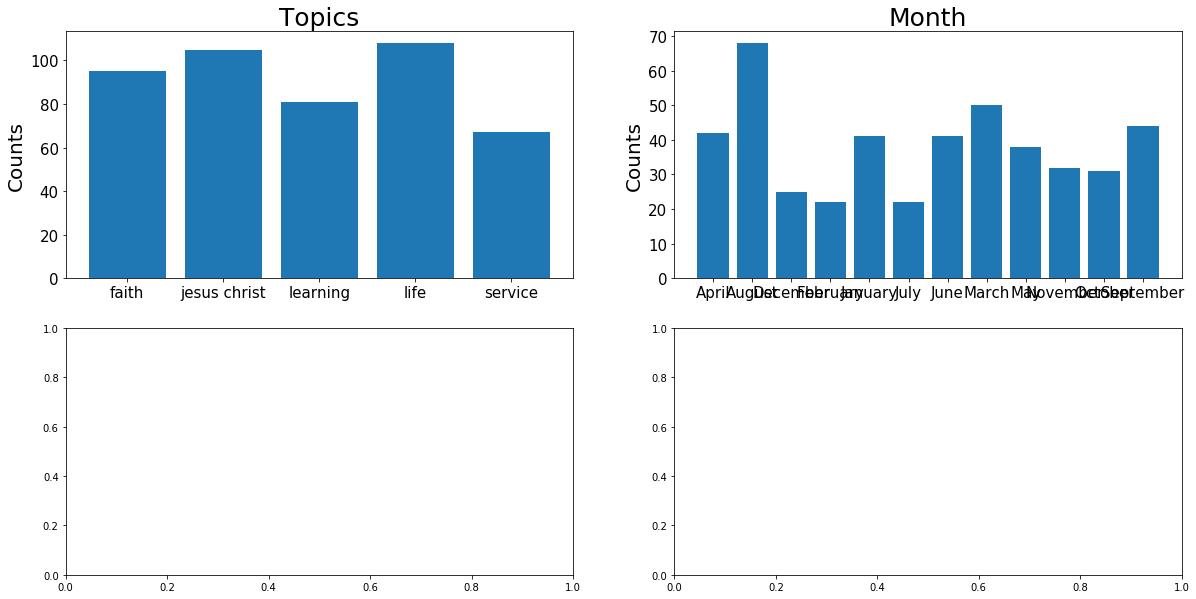

In [197]:
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Topics = df.groupby('topic_singular').size().reset_index(name='Counts')['topic_singular']
Y_Topics = df.groupby('topic_singular').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0,0].bar(X_Topics, Y_Topics)
axes[0,0].set_title('Topics', fontsize=25)
axes[0,0].set_ylabel('Counts', fontsize=20)
axes[0,0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Month = df.groupby('month').size().reset_index(name='Counts')['month']
Y_Month = df.groupby('month').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Month, Y_Month)
axes[0, 1].set_title('Month', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

plt.show()
